# Exponent Distribution: Black Holes vs Live Tokens

**Hypothesis:** All 13 black holes share the same exponent on all dimensions because they never moved far from initialization. Live tokens, having been trained, should show a wider spread of exponents.

---

In [1]:
import torch
from safetensors.torch import load_file
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
tensors = load_file("../tensors/qwen3_4b_instruct_2507.safetensors")
W = tensors["W"]  # [151936, 2560] bf16
black_hole_mask = tensors["black_hole_mask"]  # [151936] bool

print(f"Total tokens: {W.shape[0]:,}")
print(f"Black hole tokens: {black_hole_mask.sum().item():,}")
print(f"Live tokens: {(~black_hole_mask).sum().item():,}")

Total tokens: 151,936
Black hole tokens: 2,100
Live tokens: 149,836


In [3]:
def extract_bf16_exponent(tensor_bf16):
    """Extract the 8-bit exponent from each bfloat16 value."""
    bits = tensor_bf16.view(torch.uint16).to(torch.int32)
    exponent = (bits >> 7) & 0xFF
    return exponent

## Exponent Distribution: Black Hole Tokens

In [4]:
W_dead = W[black_hole_mask]  # [2100, 2560]
exp_dead = extract_bf16_exponent(W_dead).flatten()

dead_counts = Counter(exp_dead.tolist())

print(f"Black hole tokens: {W_dead.shape[0]:,} tokens × {W_dead.shape[1]:,} dims = {exp_dead.numel():,} values")
print(f"Unique exponents in dead tokens: {len(dead_counts)}")
print("\nExponent histogram (dead tokens):")
for exp in sorted(dead_counts.keys()):
    count = dead_counts[exp]
    pct = 100 * count / exp_dead.numel()
    mag_low = 2**(exp - 127)
    mag_high = 2**(exp - 126)
    print(f"  E={exp}: {count:10,} ({pct:5.1f}%)  |val| ∈ [{mag_low:.2e}, {mag_high:.2e})")

Black hole tokens: 2,100 tokens × 2,560 dims = 5,376,000 values
Unique exponents in dead tokens: 16

Exponent histogram (dead tokens):
  E=107:      4,200 (  0.1%)  |val| ∈ [9.54e-07, 1.91e-06)
  E=108:      2,100 (  0.0%)  |val| ∈ [1.91e-06, 3.81e-06)
  E=110:      4,200 (  0.1%)  |val| ∈ [7.63e-06, 1.53e-05)
  E=111:      4,200 (  0.1%)  |val| ∈ [1.53e-05, 3.05e-05)
  E=112:     25,200 (  0.5%)  |val| ∈ [3.05e-05, 6.10e-05)
  E=113:     37,800 (  0.7%)  |val| ∈ [6.10e-05, 1.22e-04)
  E=114:    121,800 (  2.3%)  |val| ∈ [1.22e-04, 2.44e-04)
  E=115:    195,300 (  3.6%)  |val| ∈ [2.44e-04, 4.88e-04)
  E=116:    445,200 (  8.3%)  |val| ∈ [4.88e-04, 9.77e-04)
  E=117:    716,100 ( 13.3%)  |val| ∈ [9.77e-04, 1.95e-03)
  E=118:  1,327,200 ( 24.7%)  |val| ∈ [1.95e-03, 3.91e-03)
  E=119:  1,690,500 ( 31.4%)  |val| ∈ [3.91e-03, 7.81e-03)
  E=120:    630,000 ( 11.7%)  |val| ∈ [7.81e-03, 1.56e-02)
  E=121:    128,100 (  2.4%)  |val| ∈ [1.56e-02, 3.12e-02)
  E=122:     39,900 (  0.7%)  |val| ∈ [

## Exponent Distribution: Live Tokens

In [5]:
W_live = W[~black_hole_mask]  # [149836, 2560]
exp_live = extract_bf16_exponent(W_live).flatten()

live_counts = Counter(exp_live.tolist())

print(f"Live tokens: {W_live.shape[0]:,} tokens × {W_live.shape[1]:,} dims = {exp_live.numel():,} values")
print(f"Unique exponents in live tokens: {len(live_counts)}")
print("\nExponent histogram (live tokens):")
for exp in sorted(live_counts.keys()):
    count = live_counts[exp]
    pct = 100 * count / exp_live.numel()
    mag_low = 2**(exp - 127)
    mag_high = 2**(exp - 126)
    print(f"  E={exp}: {count:10,} ({pct:5.1f}%)  |val| ∈ [{mag_low:.2e}, {mag_high:.2e})")

Live tokens: 149,836 tokens × 2,560 dims = 383,580,160 values
Unique exponents in live tokens: 34

Exponent histogram (live tokens):
  E=91:          1 (  0.0%)  |val| ∈ [1.46e-11, 2.91e-11)
  E=92:          1 (  0.0%)  |val| ∈ [2.91e-11, 5.82e-11)
  E=93:          3 (  0.0%)  |val| ∈ [5.82e-11, 1.16e-10)
  E=94:          2 (  0.0%)  |val| ∈ [1.16e-10, 2.33e-10)
  E=95:          2 (  0.0%)  |val| ∈ [2.33e-10, 4.66e-10)
  E=96:         11 (  0.0%)  |val| ∈ [4.66e-10, 9.31e-10)
  E=97:         11 (  0.0%)  |val| ∈ [9.31e-10, 1.86e-09)
  E=98:         26 (  0.0%)  |val| ∈ [1.86e-09, 3.73e-09)
  E=99:         53 (  0.0%)  |val| ∈ [3.73e-09, 7.45e-09)
  E=100:        118 (  0.0%)  |val| ∈ [7.45e-09, 1.49e-08)
  E=101:        228 (  0.0%)  |val| ∈ [1.49e-08, 2.98e-08)
  E=102:        441 (  0.0%)  |val| ∈ [2.98e-08, 5.96e-08)
  E=103:        949 (  0.0%)  |val| ∈ [5.96e-08, 1.19e-07)
  E=104:      1,763 (  0.0%)  |val| ∈ [1.19e-07, 2.38e-07)
  E=105:      3,515 (  0.0%)  |val| ∈ [2.38e-07, 4

## Visual Comparison

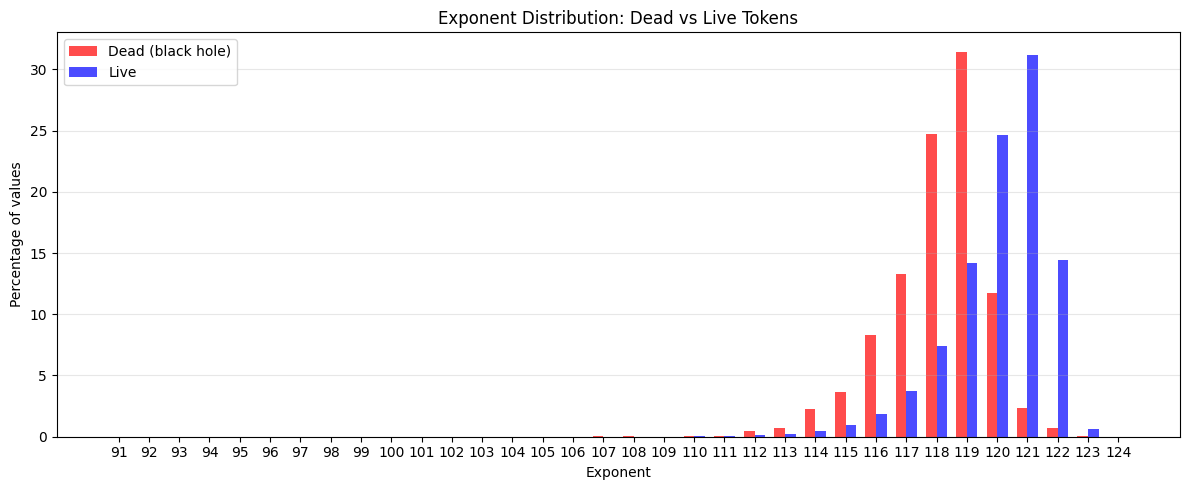

In [6]:
# Get all unique exponents across both
all_exps = sorted(set(dead_counts.keys()) | set(live_counts.keys()))

dead_pcts = [100 * dead_counts.get(e, 0) / exp_dead.numel() for e in all_exps]
live_pcts = [100 * live_counts.get(e, 0) / exp_live.numel() for e in all_exps]

fig, ax = plt.subplots(figsize=(12, 5))

x = range(len(all_exps))
width = 0.35

ax.bar([i - width/2 for i in x], dead_pcts, width, label='Dead (black hole)', color='red', alpha=0.7)
ax.bar([i + width/2 for i in x], live_pcts, width, label='Live', color='blue', alpha=0.7)

ax.set_xlabel('Exponent')
ax.set_ylabel('Percentage of values')
ax.set_title('Exponent Distribution: Dead vs Live Tokens')
ax.set_xticks(x)
ax.set_xticklabels(all_exps)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('exponent_distribution@72.png', dpi=72)
plt.show()

## Magnitude Statistics

In [7]:
abs_dead = W_dead.float().abs()
abs_live = W_live.float().abs()

print("Magnitude statistics:")
print(f"\n  Dead tokens:")
print(f"    min |W|:  {abs_dead.min().item():.6f}")
print(f"    max |W|:  {abs_dead.max().item():.6f}")
print(f"    mean |W|: {abs_dead.mean().item():.6f}")
print(f"    std |W|:  {abs_dead.std().item():.6f}")

print(f"\n  Live tokens:")
print(f"    min |W|:  {abs_live.min().item():.6f}")
print(f"    max |W|:  {abs_live.max().item():.6f}")
print(f"    mean |W|: {abs_live.mean().item():.6f}")
print(f"    std |W|:  {abs_live.std().item():.6f}")

Magnitude statistics:

  Dead tokens:
    min |W|:  0.000001
    max |W|:  0.080078
    mean |W|: 0.004804
    std |W|:  0.005537

  Live tokens:
    min |W|:  0.000000
    max |W|:  0.246094
    mean |W|: 0.017238
    std |W|:  0.013474


## Interpretation

In [8]:
print("="*60)
print("FINDINGS")
print("="*60)

dead_exp_spread = max(dead_counts.keys()) - min(dead_counts.keys())
live_exp_spread = max(live_counts.keys()) - min(live_counts.keys())

print(f"Dead token exponent spread: {dead_exp_spread} (from {min(dead_counts.keys())} to {max(dead_counts.keys())})")
print(f"Live token exponent spread: {live_exp_spread} (from {min(live_counts.keys())} to {max(live_counts.keys())})")
print()

if live_exp_spread > dead_exp_spread:
    print("Live tokens span MORE exponents than dead tokens.")
    print("This supports the hypothesis: dead tokens stayed near initialization,")
    print("while live tokens scattered during training.")
else:
    print("Unexpected: dead and live tokens have similar exponent spread.")
    print("Need to investigate further.")

FINDINGS
Dead token exponent spread: 16 (from 107 to 123)
Live token exponent spread: 33 (from 91 to 124)

Live tokens span MORE exponents than dead tokens.
This supports the hypothesis: dead tokens stayed near initialization,
while live tokens scattered during training.
